<h1>Problemas de regresión - Ejercicio 2</h1>

A01639224 | Fausto Alejandro Palma Cervantes

TC3006C.102 | Inteligencia artificial avanzada para la ciencia de datos I

28 de agosto de 2023

In [ ]:
# Importar librerías y módulos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate, KFold
import numpy as np
from sklearn.feature_selection import SelectKBest, r_regression, SequentialFeatureSelector, RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

# Ejercicio 2

**2 - Todas las variables, menos X2, X6, X10, X14, X18**

In [ ]:
# Importar el conjunto de datos
led_df = pd.read_csv('/content/drive/MyDrive/z. Aprendizaje/Life Expectancy Data.csv')
led_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# 1. Evalúa con validación cruzada un modelo de regresión lineal para las variables
# asignadas según tu matrícula utilizando alguna librería o framework.

# Eliminar registros con valores nulos
led_df.dropna(inplace=True)

# Matriz de las variables predictoras
x = led_df.drop(['Country', 'Year',	'Status', 'Life expectancy ', 'infant deaths', 'Measles ', 'Total expenditure', 'Population', 'Schooling'], axis=1).to_numpy()

# Arreglo de la variable de respuesta
y = led_df['Life expectancy '].to_numpy()

# Creación del modelo
model = LinearRegression()

# Ajuste del modelo
model.fit(x, y)

# Impresión de resultados
print("Coeficientes del modelo: ", model.coef_)
print("Intercepto del modelo: ", model.intercept_)

# Calcular métricas MSE, MAE y R^2 con cross_validate
scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

# Realizar validación cruzada
results = cross_validate(model, x, y, cv=17, scoring=scoring)
# cv : plieges, scoring : métricas

# Calcular y mostrar promedio de cada métrica
print('MSE: ', np.mean(results["test_mse"]))
print("MAE: ", np.mean(results["test_mae"]))
print("R^2: ", np.mean(results["test_r2"]))

Coeficientes del modelo:  [-1.96994569e-02  3.45870007e-02  2.44581955e-04 -5.27410042e-03
  5.50687685e-02 -2.59113222e-03  1.74407273e-02  2.34737374e-02
 -4.32085448e-01  5.05043308e-05 -6.25244236e-02  1.05458390e-02
  1.69019221e+01]
Intercepto del modelo:  57.44131799006827
MSE:  18.148492188328156
MAE:  3.1255409417300255
R^2:  0.7014577963224626


In [ ]:
# 2. Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada.
# Una vez que tengas el número óptimo, muestra las características seleccionadas.

# Definir el número de características
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# Arreglo para guardar los valores para cada número de características
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

# Repetir el proceso por cada característica
for n_feat in n_feats:

    # Arreglo para guardar los valores de las pruebas
    mse_cv = []
    mae_cv = []
    r2_cv = []

    # Dividir los conjuntos de prueba y entrenamiento
    kf = KFold(n_splits=17, shuffle = True)
    # n_splits : número de plieges

    for train_index, test_index in kf.split(x):

        # Seleccionar el número óptimo de predictores
        x_train = x[train_index, :]
        y_train = y[train_index]
        regr_cv = LinearRegression()
        fselection_cv = SelectKBest(r_regression, k = n_feat)

        # Seleccionar los predictores óptimos
        fselection_cv.fit(x_train, y_train)

        # Calcular un modelo con los predictores óptimos
        x_train = fselection_cv.transform(x_train)
        regr_cv.fit(x_train, y_train)

        # Probar el modelo con el conjunto de prueba
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        # Calcular los valores de MSE, MAE y R^2 y añadir a sus respectivos arreglos
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    # Calcular los valores de MSE, MAE y R^2 para cada cada número de características
    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    # Imprimir el resultado de las pruebas de cada número de características
    print('N:', n_feat, ' | MSE:', mse, '  MAE:', mae,'  R^2:', r2)

# Imprimir el número óptimo de predictores
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de predictores: ", opt_features)

# Seleccionar el número óptimo de predictores
regr = LinearRegression()
fselection = SelectKBest(r_regression, k = opt_features)
fselection.fit(x, y)
print("Predictores óptimos: ", fselection.get_feature_names_out())

# Calcular un modelo con los predictores óptimos
x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Coeficientes del modelo: ", model.coef_)
print("Intercepto del modelo: ", model.intercept_)

N: 1  | MSE: 37.30430826415641   MAE: 4.242541880671888   R^2: 0.5164354259229741
N: 2  | MSE: 34.190002159665056   MAE: 4.161011709548528   R^2: 0.554366339461457
N: 3  | MSE: 33.13284847146791   MAE: 4.148588817323639   R^2: 0.5653466593067844
N: 4  | MSE: 33.179030820720904   MAE: 4.151783702741383   R^2: 0.5591501478353087
N: 5  | MSE: 33.012763926993166   MAE: 4.124716554449351   R^2: 0.5603410527158852
N: 6  | MSE: 32.13459477066927   MAE: 4.073293995675175   R^2: 0.5814290109448998
N: 7  | MSE: 31.939361334535285   MAE: 4.0551020611035105   R^2: 0.5820384382536796
N: 8  | MSE: 31.872188042503574   MAE: 4.050940313729059   R^2: 0.5841058839869271
N: 9  | MSE: 31.956980689076463   MAE: 4.071410641142577   R^2: 0.5746089866951419
N: 10  | MSE: 31.56995623010626   MAE: 4.053581689848859   R^2: 0.5839769705927144
N: 11  | MSE: 31.885374918756128   MAE: 4.072980880851725   R^2: 0.5811758268587122
N: 12  | MSE: 19.196032484472852   MAE: 3.325016409303016   R^2: 0.7483402881589442
N: 13

In [1]:
# 3. Repite el paso anterior pero con selección de características secuencial (Wrapper).
# Reporta los predictores óptimos encontrados por el método.

# Definir el número de características
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Arreglo para guardar los valores para cada número de características
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

# Repetir el proceso por cada característica
for n_feat in n_feats:

    # Arreglo para guardar los valores de las pruebas
    mse_cv = []
    mae_cv = []
    r2_cv = []

    # Dividir los conjuntos de prueba y entrenamiento
    kf = KFold(n_splits=17, shuffle = True)
    # n_splits : número de plieges

    for train_index, test_index in kf.split(x):

        # Seleccionar el número óptimo de predictores
        x_train = x[train_index, :]
        y_train = y[train_index]
        regr_cv = LinearRegression()
        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)

        # Seleccionar los predictores óptimos
        fselection_cv.fit(x_train, y_train)

        # Calcular un modelo con los predictores óptimos
        x_train = fselection_cv.transform(x_train)
        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        # Calcular los valores de MSE, MAE y R^2 y añadir a sus respectivos arreglos
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    # Calcular los valores de MSE, MAE y R^2 para cada cada número de características
    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    # Imprimir el resultado de las pruebas de cada número de características
    print('N:', n_feat, ' | MSE:', mse, '  MAE:', mae,'  R^2:', r2)

# Imprimir el número óptimo de predictores
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de predictores: ", opt_features)

# Seleccionar el número óptimo de predictores
regr = LinearRegression()
fselection = SequentialFeatureSelector(regr, n_features_to_select = opt_features)
fselection.fit(x, y)
print("Predictores óptimos: ", fselection.get_feature_names_out())

# Calcular un modelo con los predictores óptimos
x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Coeficientes del modelo: ", model.coef_)
print("Intercepto del modelo: ", model.intercept_)

NameError: ignored

In [ ]:
# 4. Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo (Filter-Wrapper).
# Reporta los predictores óptimos encontrados por el método.

# Definir el número de características
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# Arreglo para guardar los valores para cada número de características
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

# Repetir el proceso por cada característica
for n_feat in n_feats:

    # Arreglo para guardar los valores de las pruebas
    mse_cv = []
    mae_cv = []
    r2_cv = []

    # Dividir los conjuntos de prueba y entrenamiento
    kf = KFold(n_splits=17, shuffle = True)
    # n_splits : número de plieges

    for train_index, test_index in kf.split(x):

        # Seleccionar el número óptimo de predictores
        x_train = x[train_index, :]
        y_train = y[train_index]
        regr_cv = LinearRegression()
        fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)

        # Seleccionar los predictores óptimos
        fselection_cv.fit(x_train, y_train)

        # Calcular un modelo con los predictores óptimos
        x_train = fselection_cv.transform(x_train)
        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        # Calcular los valores de MSE, MAE y R^2 y añadir a sus respectivos arreglos
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    # Calcular los valores de MSE, MAE y R^2 para cada cada número de características
    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    # Imprimir el resultado de las pruebas de cada número de características
    print('N:', n_feat, ' | MSE:', mse, '  MAE:', mae,'  R^2:', r2)

# Imprimir el número óptimo de predictores
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de predictores: ", opt_features)

# Seleccionar el número óptimo de predictores
regr = LinearRegression()
fselection = RFE(regr, n_features_to_select = opt_features)
fselection.fit(x, y)
print("Predictores óptimos: ", fselection.get_feature_names_out())

# Calcular un modelo con los predictores óptimos
x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Coeficientes del modelo: ", model.coef_)
print("Intercepto del modelo: ", model.intercept_)

N: 1  | MSE: 37.36551154704997   MAE: 4.249755216690785   R^2: 0.5035583952304861
N: 2  | MSE: 23.25454770823098   MAE: 3.534025849724838   R^2: 0.693632538331727
N: 3  | MSE: 22.319516941822844   MAE: 3.5098672125917028   R^2: 0.7038027506443016
N: 4  | MSE: 22.036334974126124   MAE: 3.4995594607629066   R^2: 0.7111991255493069
N: 5  | MSE: 21.086102993359106   MAE: 3.4220309508802096   R^2: 0.7224457454768187
N: 6  | MSE: 20.840063106804372   MAE: 3.419071801120718   R^2: 0.7267938019207153
N: 7  | MSE: 19.640218421031502   MAE: 3.295943771398242   R^2: 0.7384223254593626
N: 8  | MSE: 16.64586534993232   MAE: 2.998935997810483   R^2: 0.777528972036757
N: 9  | MSE: 16.63256938660793   MAE: 2.993307724822673   R^2: 0.7810358442289038
N: 10  | MSE: 16.575172870089656   MAE: 2.9924008164079177   R^2: 0.7760967678165027
N: 11  | MSE: 16.46143431882318   MAE: 2.996808656023012   R^2: 0.7840956045412832
N: 12  | MSE: 15.760814406690042   MAE: 2.95746671907676   R^2: 0.7920726875491867
N: 13

In [ ]:
# 5. Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.
# "Para un modelo no lineal, R^2 no tiene sentido alguno"

from sklearn.neighbors import KNeighborsRegressor

# Creación del modelo
model = KNeighborsRegressor(n_neighbors = 10)

# Ajuste del modelo
model.fit(x, y)

# Impresión de resultados

# Calcular métricas MSE, MAE y R^2 con cross_validate
scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
}

# Realizar validación cruzada
results = cross_validate(model, x, y, cv=17, scoring=scoring)

# Calcular y mostrar promedio de cada métrica
print('MSE: ', np.mean(results["test_mse"]))
print("MAE: ", np.mean(results["test_mae"]))

MSE:  23.868732807762278
MAE:  3.4769557307459067


In [ ]:
# FILTER

# Definir el número de características
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# Arreglo para guardar los valores para cada número de características
mse_nfeat = []
mae_nfeat = []

# Repetir el proceso por cada característica
for n_feat in n_feats:

    # Arreglo para guardar los valores de las pruebas
    mse_cv = []
    mae_cv = []

    # Dividir los conjuntos de prueba y entrenamiento
    kf = KFold(n_splits=17, shuffle = True)
    # n_splits : número de plieges

    for train_index, test_index in kf.split(x):

        # Seleccionar el número óptimo de predictores
        x_train = x[train_index, :]
        y_train = y[train_index]
        regr_cv = KNeighborsRegressor(n_neighbors = 10)
        fselection_cv = SelectKBest(r_regression, k = n_feat)

        # Seleccionar los predictores óptimos
        fselection_cv.fit(x_train, y_train)

        # Calcular un modelo con los predictores óptimos
        x_train = fselection_cv.transform(x_train)
        regr_cv.fit(x_train, y_train)

        # Probar el modelo con el conjunto de prueba
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        # Calcular los valores de MSE, MAE y R^2 y añadir a sus respectivos arreglos
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

    # Calcular los valores de MSE, MAE y R^2 para cada cada número de características
    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    # Imprimir el resultado de las pruebas de cada número de características
    print('N:', n_feat, ' | MSE:', mse, '  MAE:', mae)

# Imprimir el número óptimo de predictores
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de predictores: ", opt_features)

# Seleccionar el número óptimo de predictores
regr = KNeighborsRegressor(n_neighbors = 10)
fselection = SelectKBest(r_regression, k = opt_features)
fselection.fit(x, y)
print("Predictores óptimos: ", fselection.get_feature_names_out())

N: 1  | MSE: 21.739477137659186   MAE: 3.4608489993935723
N: 2  | MSE: 33.313908489993935   MAE: 4.416876895087932
N: 3  | MSE: 42.77377919951486   MAE: 4.8287143723468775
N: 4  | MSE: 43.38181255306247   MAE: 4.92146149181322
N: 5  | MSE: 44.06877550030322   MAE: 4.97262583383869
N: 6  | MSE: 42.386709157064885   MAE: 4.856337174044875
N: 7  | MSE: 42.49139144936325   MAE: 4.882844147968465
N: 8  | MSE: 43.087139599757435   MAE: 4.89454214675561
N: 9  | MSE: 39.22546561552456   MAE: 4.601152213462704
N: 10  | MSE: 39.42612201334142   MAE: 4.627180109157066
N: 11  | MSE: 39.541152698605224   MAE: 4.646137052759249
N: 12  | MSE: 37.970220982413586   MAE: 4.546610066707096
N: 13  | MSE: 20.066991934505765   MAE: 3.1697210430563976
Número óptimo de predictores:  13
Predictores óptimos:  ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12']


In [ ]:
# WRAPPER

# Definir el número de características
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Arreglo para guardar los valores para cada número de características
mse_nfeat = []
mae_nfeat = []

# Repetir el proceso por cada característica
for n_feat in n_feats:

    # Arreglo para guardar los valores de las pruebas
    mse_cv = []
    mae_cv = []

    # Dividir los conjuntos de prueba y entrenamiento
    kf = KFold(n_splits=17, shuffle = True)

    for train_index, test_index in kf.split(x):

        # Seleccionar el número óptimo de predictores
        x_train = x[train_index, :]
        y_train = y[train_index]
        regr_cv = KNeighborsRegressor(n_neighbors = 10)
        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)

        # Seleccionar los predictores óptimos
        fselection_cv.fit(x_train, y_train)

        # Calcular un modelo con los predictores óptimos
        x_train = fselection_cv.transform(x_train)
        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        # Calcular los valores de MSE, MAE y R^2 y añadir a sus respectivos arreglos
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

    # Calcular los valores de MSE, MAE y R^2 para cada cada número de características
    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    # Imprimir el resultado de las pruebas de cada número de características
    print('N:', n_feat, ' | MSE:', mse, '  MAE:', mae)

# Imprimir el número óptimo de predictores
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de predictores: ", opt_features)

# Seleccionar el número óptimo de predictores
regr = KNeighborsRegressor(n_neighbors = 10)
fselection = SequentialFeatureSelector(regr, n_features_to_select = opt_features)
fselection.fit(x, y)
print("Predictores óptimos: ", fselection.get_feature_names_out())

N: 1  | MSE: 17.152851728320197   MAE: 2.5977380230442693
N: 2  | MSE: 10.386366646452396   MAE: 2.2689630078835656
N: 3  | MSE: 7.574401394784718   MAE: 1.952595512431777
N: 4  | MSE: 7.618319223771985   MAE: 1.8552456033959976
N: 5  | MSE: 6.899679805942997   MAE: 1.7991146149181323
N: 6  | MSE: 6.979426682838084   MAE: 1.7962765312310491
N: 7  | MSE: 6.828868647665253   MAE: 1.7513038204972713
N: 8  | MSE: 7.477462886597938   MAE: 1.8118920557913887
N: 9  | MSE: 8.433902789569437   MAE: 1.9184536082474228
N: 10  | MSE: 9.047544815039416   MAE: 1.9751970891449364
N: 11  | MSE: 11.326970648878106   MAE: 2.338241358399029
N: 12  | MSE: 11.115406852637966   MAE: 2.29310491206792
Número óptimo de predictores:  7
Predictores óptimos:  ['x0' 'x1' 'x4' 'x8' 'x10' 'x11' 'x12']


In [ ]:
# 6. Agregue la variables "Status" (segunda columna) como variable predictora, y utiliza un
# árbol de decisión para generar un modelo de regresión para la varible Life expectancy".
# Evalúa este modelo con validación cruzada utilizando la métrica adecuada.

x = led_df.drop(['Country', 'Year', 'Life expectancy ', 'infant deaths', 'Measles ', 'Total expenditure', 'Population', 'Schooling'], axis=1)
#.to_numpy()
x

# Eliminar registros con valores nulos
led_df.dropna(inplace=True)

# Matriz de las variables predictoras
x = led_df.drop(['Country', 'Year',	'Status', 'Life expectancy ', 'infant deaths', 'Measles ', 'Total expenditure', 'Population', 'Schooling'], axis=1).to_numpy()

# Arreglo de la variable de respuesta
y = led_df['Life expectancy '].to_numpy()

# Creación del modelo
model = DecisionTreeRegressor()

# Ajuste del modelo
model.fit(x, y)

# Calcular métricas MSE, MAE y R^2 con cross_validate
scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
}

# Realizar validación cruzada
results = cross_validate(model, x, y, cv=17, scoring=scoring)

# Calcular y mostrar promedio de cada métrica
print('MSE: ', np.mean(results["test_mse"]))
print("MAE: ", np.mean(results["test_mae"]))

MSE:  12.656925409338994
MAE:  2.5668283808368706


MSE:  6.537859181818182
MAE:  1.5186451515151516


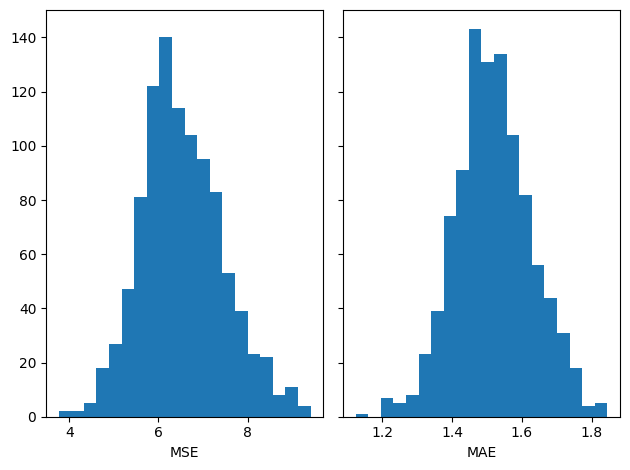

In [ ]:
# Dividir los conjuntos de prueba y entrenamiento aleatoriamente
kf = ShuffleSplit(n_splits=1000, test_size = 0.2)

# Arreglo para guardar los valores de las pruebas
mse_cv = []
mae_cv = []

# Repetir el proceso por cada división
for train_index, test_index in kf.split(x):

    # Crear una regresión lineal con el conjunto de entrenamiento
    x_train = x[train_index, :]
    y_train = y[train_index]
    model.fit(x_train, y_train)

    # Probar la regresión lineal con el conjunto de prueba
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = model.predict(x_test)

    # Calcular los valores de MSE, MAE y añadir a sus respectivos arreglos
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)

# Imprimir los resultados
print('MSE: ', np.average(mse_cv))
print("MAE: ", np.average(mae_cv))

# Crear una figura y diseño para mostrar los histogramas de MSE y MAE.
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# Grafiar histograma de MSE
axs[0].hist(mse_cv, bins=20)
axs[0].set_xlabel("MSE")

# Grafiar histograma de MAE
axs[1].hist(mae_cv, bins=20)
axs[1].set_xlabel("MAE")

# Mostrar figura
plt.show()

###7. Viendo los resultados de este ejercicio, escriba una conclusión sobre los siguientes puntos:

**1. Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?**

Considerando los valores de MSE, MAE y R^2 (18.14, 3.12 y 0.70 respectivamente) y ya que el modelo no lineal generó peores resultados al hacer la validación cruzada, el modelo de regresión lineal podría calificarse como adecuado para los datos. Sin embargo, a falta de experimentación, no es posible asegurar que no exista otro modelo más adecuado.

**2. ¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?**

Considerando que se utilizó el MSE para la selección de características, creo que el método Wrapper funciona bien con los datos. Suponiendo que el propopósito de la selección de características es disminuir el número de variables predictoras, dicho método fue el único que en varios intentos disminuyó el número de variables predictoras. En general los valores de MSE, MAE y R^2 se mantuvieron relativamente similares en los modelos finales.

**3. Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevantes observas de dichas características?**

Al comparar los procesos de selección de características finales, hubo cuatro que se mantuvieron constantes en todos los modelos: Adult Mortality, BMI, Thinness 1-19 years e Income composition of resources. Pese a que se puede argumentar la importancia de cada una de las variables predictoras de los modelos, estas variables en su mayoría tienen que ver con la salud de las personas. Además, la disponibilidad de recursos muchas veces llega a determinar la salud a largo plazo de los individuos, especialmente previo a la adultez.

**4. ¿El modelo de regresión no lineal funcionó mejor que el lineal? ¿Por qué?**

El modelo de regresión no lineal no funcionó mejor que el lineal al comparar los resultados de su validación cruzada. El modelo lineal obtuvo un MSE de 18.14 y MAE de 3.12. El modelo no lineal un MSE de 23.86 y un MAE de 3.47. Cabe mencionar que hacer una comparación de R^2 no tendría sentido alguno ya que solo uno de los modelos es lineal.

**5. ¿Notas alguna mejora con el árbol de decisión al agregar la variable categórica "Status"? ¿Por qué?**

Sí noto una mejra con el árbol de decisión con la variable categórica "Status". Utilizar una variable categórica como variable predictora facilita la división de los datos. En este caso la variable categórica indica si un país está o no en desarrollo. En el mundo real esta información afecta un sinfin de métricas, incluyendo expectativa de vida.

**6. ¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.**

Se puede concluir que sí es posible estimar la expectativa de vida de los habitantes de un país utilizando otras métricas. Dependiendo del tipo y número de variables de predicción se pueden crear modelos muy o no muy exactos. Este tipo de información es importante para la toma de decisiones de las economías globales ya que se pueden identificar algunas de las variables que más influyen en la expectativa de vida con el fin de hacer algo al respecto y con ello mejorar la calidad de vida de las personas.